In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('forestfires.csv')

df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
df.area.value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

In [4]:
df['forest_fire_scale']=df['area'].apply(lambda x: 'no_fire' if (x==0) else
                                                   'small_fire' if (x>0)&(x<2) else
                                                   'large_fire')

In [5]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,forest_fire_scale
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,no_fire
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,no_fire
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,no_fire
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,no_fire
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,no_fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large_fire
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large_fire
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large_fire
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,no_fire


In [6]:
df.forest_fire_scale.value_counts()

no_fire       247
large_fire    208
small_fire     62
Name: forest_fire_scale, dtype: int64

In [7]:
df_copy = df.copy()

In [8]:
df_copy['forest_fire_scale_encoded'] = df_copy.forest_fire_scale.map({'no_fire':0,'small_fire':1,'large_fire':2})

In [9]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,forest_fire_scale
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,no_fire
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,no_fire
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,no_fire
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,no_fire
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,no_fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large_fire
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large_fire
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large_fire
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,no_fire


In [10]:
df_copy.forest_fire_scale_encoded.value_counts()

0    247
2    208
1     62
Name: forest_fire_scale_encoded, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df_copy.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [13]:
df_copy['month_le'] =  df_copy.month.map({'jan':0,'feb':1,'mar':2,
                                'apr':3,'may':4,'jun':5,'jul':6,
                                'aug':7,'sep':8,'oct':9,
                                'nov':10,'dec':11,})

In [14]:
df_copy.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [15]:
df_copy['day_le'] = df_copy.day.map({'mon':0,'tue':1,'wed':2,
                           'thu':3,'fri':4,'sat':5,
                           'sun':6,})

In [18]:
df_copy

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,forest_fire_scale,forest_fire_scale_encoded,month_le,day_le
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,no_fire,0,2,4
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,no_fire,0,9,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,no_fire,0,9,5
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,no_fire,0,2,4
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,no_fire,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large_fire,2,7,6
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large_fire,2,7,6
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large_fire,2,7,6
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,no_fire,0,7,5


In [17]:
df_copy.corr()

C:\Users\atifa\AppData\Local\Temp\ipykernel_13188\382007831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,forest_fire_scale_encoded,month_le,day_le
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,0.048413,-0.065003,-0.024922
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,0.066821,-0.066292,-0.005453
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.049115,0.291477,-0.041068
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.063131,0.466645,0.062870
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.082448,0.868698,0.000105
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.006242,0.186597,0.032909
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.040107,0.368842,0.052190
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.016338,-0.095280,0.092151
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.071634,-0.086368,0.032478
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,0.036693,0.013438,-0.048340


(array([443.,  25.,  19.,   8.,   4.,   3.,   4.,   2.,   0.,   0.,   0.,
          1.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([   0.    ,   13.6355,   27.271 ,   40.9065,   54.542 ,   68.1775,
          81.813 ,   95.4485,  109.084 ,  122.7195,  136.355 ,  149.9905,
         163.626 ,  177.2615,  190.897 ,  204.5325,  218.168 ,  231.8035,
         245.439 ,  259.0745,  272.71  ,  286.3455,  299.981 ,  313.6165,
         327.252 ,  340.8875,  354.523 ,  368.1585,  381.794 ,  395.4295,
         409.065 ,  422.7005,  436.336 ,  449.9715,  463.607 ,  477.2425,
         4

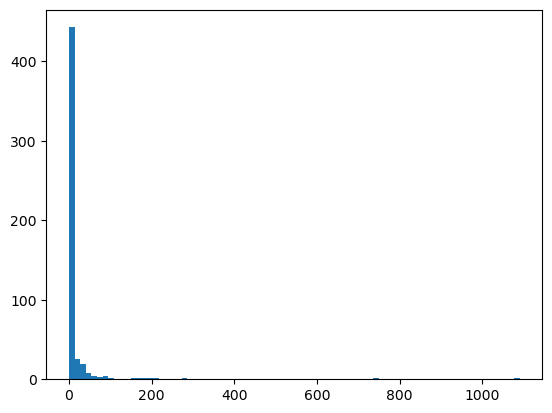

In [25]:
plt.hist(df_copy['area'],bins=80)

<BarContainer object of 12 artists>

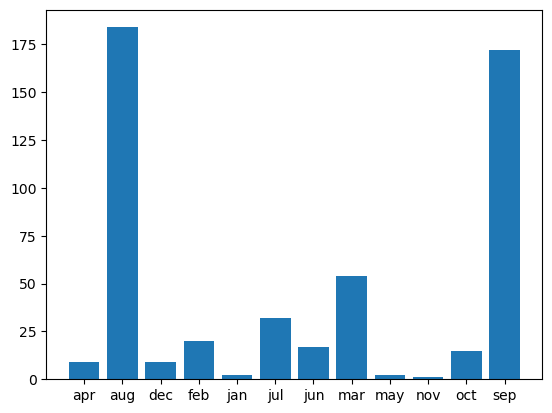

In [26]:
month_count = df_copy.groupby(['month'])['month'].count()

plt.bar(month_count.index,month_count)